# Yield Curve Analysis

Sources:
1. [PyQuant News](https://twitter.com/pyquantnews/status/1625120952290889728)
2. [Stack OverFlow](https://stackoverflow.com/questions/33017564/plotting-treasury-yield-curve-how-to-overlay-two-yield-curves-using-matplotlib)

## Load Dependencies

In [88]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib inline

In [89]:
# import openbb and print version
from openbb_terminal.sdk import openbb

## Load Data from OpenBB

In [90]:
# set maturities
maturities = ['1m', '3m', '6m', '1y', '2y', '3y', '5y', '7y', '10y', '20y', '30y']
df = openbb.economy.treasury(
    instruments=['nominal'],
    maturities=maturities,
    start_date='2000-01-01'
)
df.columns = maturities

In [105]:
df.tail()

,1m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
TIME_PERIOD,,,,,,,,,,,
2022-10-01,3.32,3.87,4.31,4.43,4.38,4.38,4.18,4.09,3.98,4.28,4.04
2022-11-01,3.87,4.32,4.61,4.73,4.50,4.34,4.06,3.99,3.89,4.22,4.00
2022-12-01,3.90,4.36,4.71,4.68,4.29,4.05,3.76,3.72,3.62,3.87,3.66
2023-01-01,4.52,4.69,4.80,4.69,4.21,3.91,3.64,3.59,3.53,3.81,3.66
2023-02-01,4.64,4.79,4.97,4.93,4.53,4.23,3.94,3.86,3.75,3.95,3.80


## Visualize

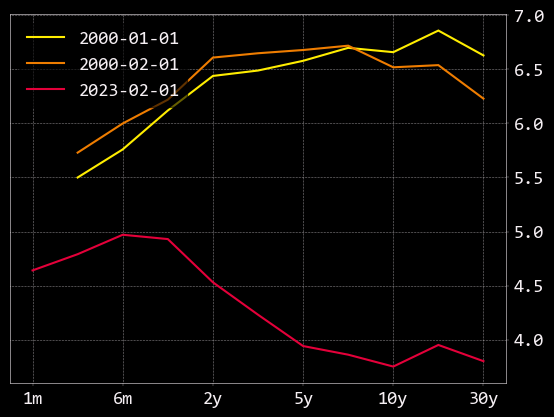

In [107]:
df.loc['2000-01-01'].plot(label='2000-01-01')
df.loc['2000-02-01'].plot(label='2000-02-01')
df.loc['2023-02-01'].plot(label='2023-02-01')
plt.legend()
plt.show()

We can clearly see an inversion to the yield curve here. 

Additional source material: [here](https://stackoverflow.com/questions/33017564/plotting-treasury-yield-curve-how-to-overlay-two-yield-curves-using-matplotlib)

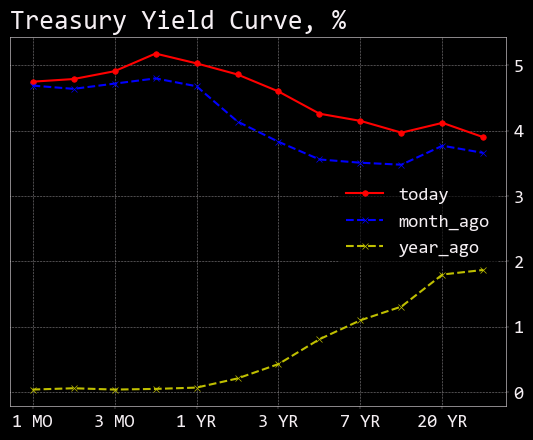

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import quandl as ql
#import Quandl as ql
%matplotlib inline

yield_ = ql.get("USTREASURY/YIELD")
today = yield_.iloc[-1,:]
month_ago = yield_.iloc[-30,:]
year_ago = yield_.iloc[-365,:]
df = pd.concat([today, month_ago, year_ago], axis=1)
df.columns = ['today', 'month_ago', 'year_ago']

df.plot(style={'today': 'ro-', 'month_ago': 'bx--', 'year_ago': 'yx--'}
        ,title='Treasury Yield Curve, %');

In [127]:
yield_.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [122]:
df.head()

,today,month_ago,two_months_ago
1 MO,4.75,4.69,3.87
2 MO,4.79,4.64,4.19
3 MO,4.91,4.72,4.37
6 MO,5.18,4.80,4.74
1 YR,5.03,4.68,4.73
